In [5]:
#Import Packages
import networkx as nx
import json
from networkx.readwrite import json_graph

#Load Data
file_path = '/Users/brookefeinberg/SamplingBalancedForests/cnty_or.json'
with open(file_path, 'r') as file:
    data = json.load(file)
    oregon = json_graph.adjacency_graph(data)


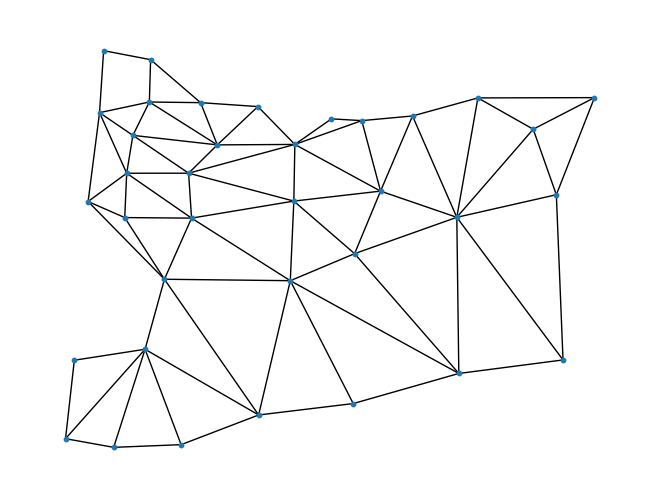

In [8]:
#Plot of Oregon
import matplotlib.pyplot as plt
node_locations = { v : ( float(oregon.nodes()[v]["INTPTLON20"]), float(oregon.nodes()[v]["INTPTLAT20"])) for v in oregon.nodes() }
plt.figure()
nx.draw(oregon, node_size = 10, pos = node_locations)
plt.show()

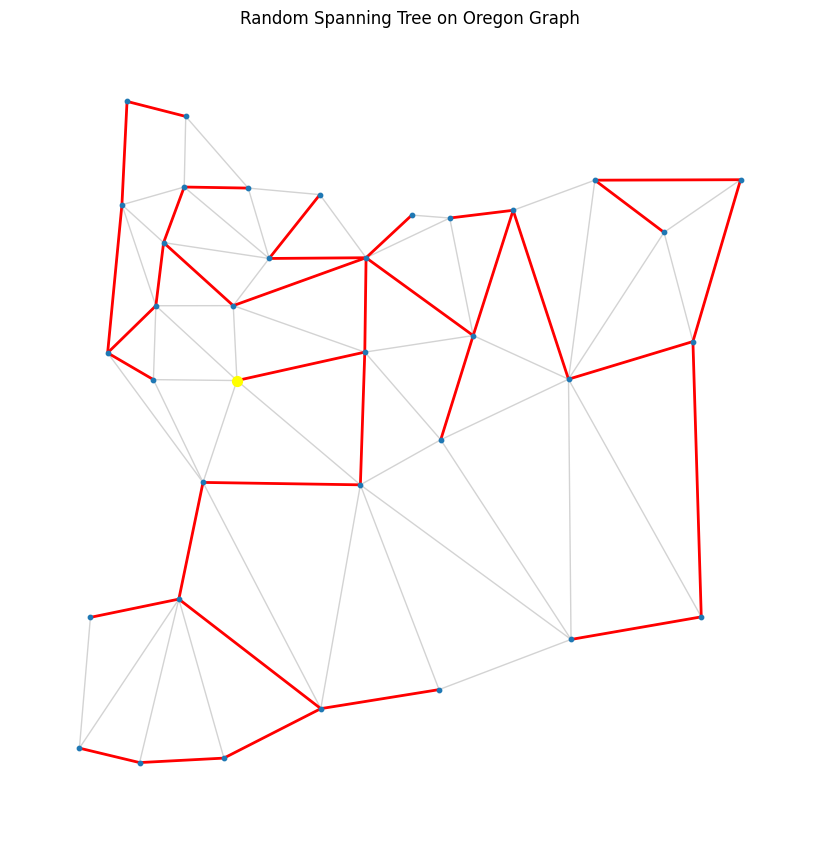

In [14]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

class WilsonsAlgorithm:
    def __init__(self, graph):
        self.graph = graph  # Store the NetworkX graph
        self.adj_list = {v: list(graph.neighbors(v)) for v in graph.nodes()}  # Adjacency list representation
        self.nv = len(self.adj_list)  # Number of vertices
        self.InTree = {node: False for node in self.adj_list}  # Tracks which nodes are already in the tree
        self.Next = {node: None for node in self.adj_list}  # Tracks the path of random walks
    
    def __random_edge(self, v):
        return random.choice(self.adj_list[v])

    def __RandomTreeWithRoot(self, r):
        self.InTree = {node: False for node in self.adj_list}
        self.InTree[r] = True  # Root node is already in the tree
        self.Next[r] = -1  # Root has no parent

        for node in self.adj_list:
            u = node
            path = []  # Path of random walk
            while not self.InTree[u]:
                path.append(u)
                self.Next[u] = self.__random_edge(u)
                u = self.Next[u]
            for vertex in path:
                self.InTree[vertex] = True

    def sample(self, seed=None):
        if seed is not None:
            random.seed(seed)

        root = random.choice(list(self.adj_list.keys()))  # Pick a random root node
        self.__RandomTreeWithRoot(root)

        # Extract the edges of the spanning tree
        spanning_tree = []
        for node in self.adj_list:
            if self.Next[node] != -1 and self.Next[node] is not None:
                spanning_tree.append((node, self.Next[node]))

        return spanning_tree, root

    def draw_tree(self, spanning_tree, root, node_locations):
        plt.figure(figsize=(8, 8))  # Create a figure for the plot

        # Draw the entire graph in light gray for reference
        nx.draw(self.graph, pos=node_locations, node_size=10, edge_color='lightgray')

        # Highlight the spanning tree edges in red and the root node in yellow
        nx.draw_networkx_edges(self.graph, pos=node_locations, edgelist=spanning_tree, edge_color='red', width=2)
        nx.draw_networkx_nodes(self.graph, pos=node_locations, nodelist=[root], node_color='yellow', node_size=50)  # Highlight the root node

        plt.title("Random Spanning Tree on Oregon Graph")
        plt.show()


# Assuming you have the Oregon graph defined with longitude and latitude as node attributes
node_locations = {v: (float(oregon.nodes[v]["INTPTLON20"]), float(oregon.nodes[v]["INTPTLAT20"])) for v in oregon.nodes()}

# Create the Wilson's Algorithm object with the Oregon graph
wilson = WilsonsAlgorithm(oregon)

# Sample a random spanning tree
spanning_tree, root = wilson.sample()

# Draw the resulting random spanning tree on the Oregon map
wilson.draw_tree(spanning_tree, root, node_locations)